<a href="https://colab.research.google.com/github/akiabe/coursera-ml-stanford/blob/master/ml_ex7_Principle_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import library
import numpy as np
import scipy.io as scio
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load training data
data = scio.loadmat('ex7data1.mat')
X = data['X']
print ("X shape: " + str(X.shape))

X shape: (50, 2)


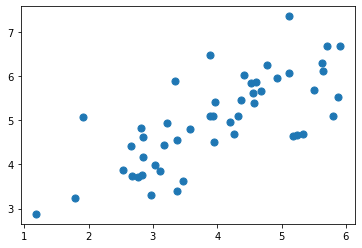

In [5]:
# Visualize data
plt.scatter(X[:, 0], X[:, 1], s=50);

In [0]:
# Feature normalization
def feature_normalization(X):
  """
  Argument:
  X -- Training examples (m, n)

  Return:
  X_norm -- Normalize training examples (m, n)
  mu -- Mean value of each feature (n, )
  sigma -- Standard deviation of each feature (n, )

  """

  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  X_norm = (X-mu) / sigma

  return X_norm, mu, sigma

In [0]:
# Compute the principal components of variation in the data
def pca(X):
  """
  Compute eigenvectors of the covariance matrix of X

  Argument:
  X -- Training examples (m, n)

  Return:
  U -- eigenvectors of the covariance matrix
  S -- eigenvalues of the covariance matrix

  """
  m, n = X.shape

  # Compute covariance matrix of the dataset
  sigma = np.dot(X.T, X)/m

  # Run SVD to compute principal components
  U, S, V = np.linalg.svd(sigma)

  return U, S, V

In [0]:
# Plot line graph
def draw_line(p1, p2, dash=False):
    """
    Draws a line from point p1 to point p2
    
    Argument:
    p1 : Point 1 np.array
    p2 : Point 2 np.array
    dash : if True, plot dash line
    
    """
    if dash:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '--',color='k')
    else:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='k')

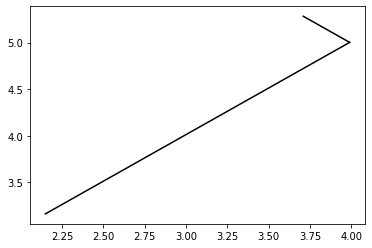


Top eigenvector U = :[-0.70710678 -0.70710678]
Expect results : -0.70710678 -0.70710678


In [14]:
# Normalize data and run PCA
X_norm, mu, sigma = feature_normalization(X)
U, S, V = pca(X_norm)

plt.figure()
draw_line(mu, mu+1.5*S[0]*U[:,0].T)
draw_line(mu, mu+1.5*S[1]*U[:,1].T)
plt.show()

print()
print("Top eigenvector U = :" +str(U[:, 0]))
print("Expect results : -0.70710678 -0.70710678")